In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### 1. Refreshing Mathematics EDITTTTTTTTTTTTTT
Let w ∈ ℝ<sup>*n*</sup> be an *n*-dimensional column vector, and *f(w)* ∈ ℝ be a function of w. In Lecture 2, we have defined the gradient ∇f(w) ∈ ℝ<sup>*n*</sup> and Hessian matrix *H* ∈ ℝ<sup>*n x n*</sup> of *f* with respect to w.

a) Let $f(w) = w^\top Xb$ where X ∈ ℝ<sup>n x p</sup> is an *n×p* matrix, and **b** is a *p*-dimensional column vector. Compute ∇**f(w)** using the definition of gradient.

b) Let $f(w) = \text{tr}(Bww^\top A)$ where **A, B** ∈ ℝⁿˣⁿ are squared matrices of size *n × n*, and tr(**A**) is the trace of the squared matrix **A**. Using the definition of gradient, compute ∇**f(w)**.

c) Let $f(w) = \text{tr}(Bww^\top A)$. Compute the Hessian matrix **H** of **f** with respect to **w** using the definition.

d) If $A = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$ and $B = \begin{bmatrix} 2 & -1 \\ -1 & 3 \end{bmatrix}$. Is **f(w)** a convex function? (*Hint: you may use Python/Matlab/R for this question.*)

e) In Lecture 5, we have defined the sigmoid function: $\sigma(a) = \frac{1}{1+e^{-a}}$. Let $f(w) = \log(\sigma(w^\top x))$ where **log** is the natural logarithm function. Compute ∇**f(w)** using the definition of gradient.


### 2. Linear and Polynomial Regression

a) Load the training data hw1xtr.dat and hw1ytr.dat into the memory and plot it on one graph. Load the test data hw1xte.dat and hw1yte.dat into the memory and plot it on another graph.

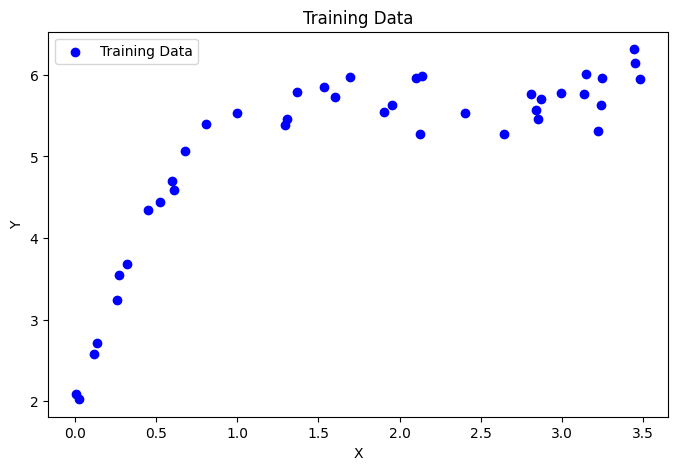

In [35]:
# Load training data hw1xtr.dat and hw1ytr.dat into the memory
trainingX = np.loadtxt("hw1xtr.dat")
trainingY = np.loadtxt("hw1ytr.dat")

# Plot training data
plt.figure(figsize=(8, 5))
plt.scatter(trainingX, trainingY, color='blue', label="Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data")
plt.legend()
plt.show()

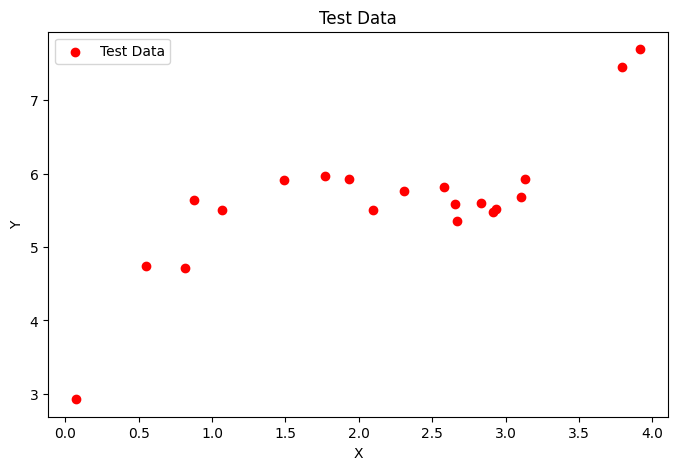

In [36]:
# Load test data hw1xte.dat and hw1yte.dat into the memory
testX = np.loadtxt("hw1xte.dat")
testY = np.loadtxt("hw1yte.dat")

# Plot test data
plt.figure(figsize=(8, 5))
plt.scatter(testX, testY, color='red', label="Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test Data")
plt.legend()
plt.show()

b) Add a column vector of 1’s to the features, then use the linear regression formula discussed in Lecture 3 to obtain a 2-dimensional weight vector. Plot both the linear regression line and the training data on the same graph. Also, report the average error on the training set using Eq. (1).

$$
\text{err} = \frac{1}{m} \sum_{i=1}^{m} (w^\top x_i - y_i)^2
$$


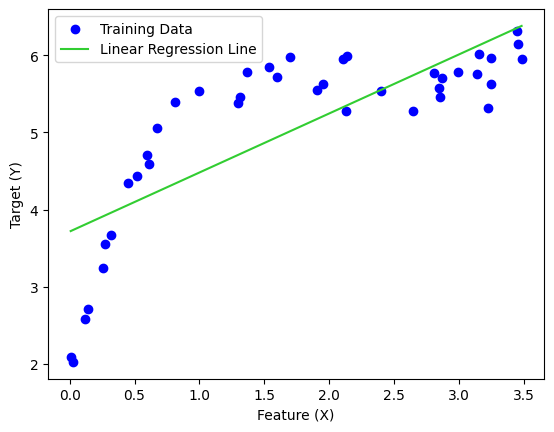

Average Error on Training Set: 0.5086


In [37]:
# Add column vector of 1's to features
X_train = np.c_[np.ones(trainingX.shape[0]), trainingX]

# Use linear regression formula to obtain 2-dimensional weight vector
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ trainingY  # (X^T * X)^(-1) * X^T * Y

# Plot linear regression line and training data on graph
plt.scatter(trainingX, trainingY, color="blue", label="Training Data")

# Generate predictions for plotting
x_vals = np.linspace(min(trainingX), max(trainingX), 100)
X_plot = np.c_[np.ones(x_vals.shape[0]), x_vals]  # Add bias term
y_vals = X_plot @ w  # Compute predictions

plt.plot(x_vals, y_vals, color="limegreen", label="Linear Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.show()

# Average error on training set using Eq. (1) (MSE)
error = (1 / trainingX.shape[0]) * np.sum((X_train @ w - trainingY) ** 2)
print(f"Average Error on Training Set: {error:.4f}")

c) Plot both the regression line and the test data on the same graph. Also report the average error on the test set using Eq. (1).

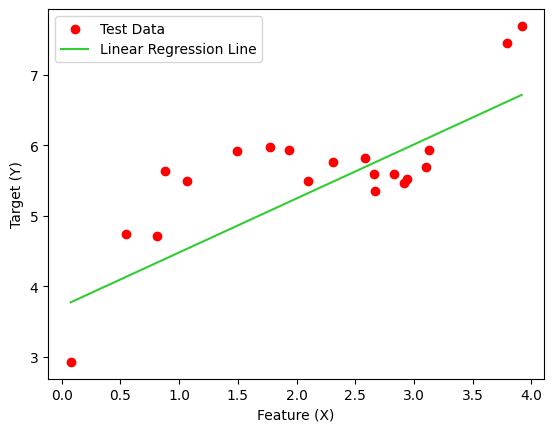

Average Error on Test Set: 0.4439


In [38]:
# Add column vector of 1's to features
X_test = np.c_[np.ones(testX.shape[0]), testX]

# Generate predictions for the test set
y_test_pred = X_test @ w  # Compute predictions using the learned weights

# Plot regression line and test data
plt.scatter(testX, testY, color="red", label="Test Data")

# Generate values for the regression line plot
x_vals = np.linspace(min(testX), max(testX), 100)
X_plot = np.c_[np.ones(x_vals.shape[0]), x_vals]  # Add bias term
y_vals = X_plot @ w  # Compute predictions

plt.plot(x_vals, y_vals, color="limegreen", label="Linear Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.show()

# Average error on test set using Eq. (1)
error_test = (1 / testX.shape[0]) * np.sum((X_test @ w - testY) ** 2)
print(f"Average Error on Test Set: {error_test:.4f}")

d) Implement the 2nd-order polynomial regression by adding new features x<sup>2</sup> to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear regression?

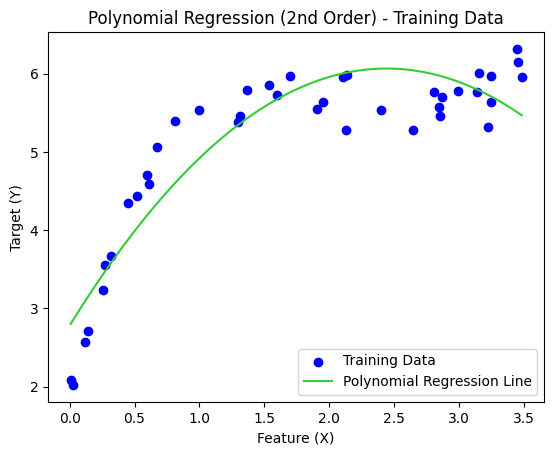

Training Error (Polynomial Regression): 0.2010


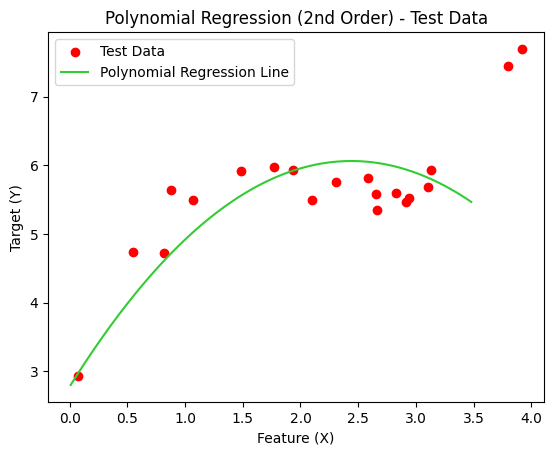

Test Error (Polynomial Regression): 0.8533

Training Error (Polynomial Regression): 0.2010
Test Error (Polynomial Regression): 0.8533


In [39]:
# 2nd-order polynomial regression
# Add x^2 as a feature to the training data
X_poly2_train = np.c_[np.ones(trainingX.shape[0]), trainingX, trainingX ** 2]  # Add x^2 feature

# Train the model with polynomial features (2nd order)
w_poly2 = np.linalg.inv(X_poly2_train.T @ X_poly2_train) @ X_poly2_train.T @ trainingY  # Normal equation


# Repeat steps from b - Plot regression line and training data for polynomial regression
plt.scatter(trainingX, trainingY, color="blue", label="Training Data")

# Generate predictions for the polynomial regression line
x_vals = np.linspace(min(trainingX), max(trainingX), 100)
X_poly2_plot = np.c_[np.ones(x_vals.shape[0]), x_vals, x_vals ** 2]  # Add x^2 as a feature for plotting
y_poly2_vals = X_poly2_plot @ w_poly2  # Compute predictions

plt.plot(x_vals, y_poly2_vals, color="limegreen", label="Polynomial Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (2nd Order) - Training Data")
plt.show()

# Repeat steps from c - Average error on training set using Eq. (1) for polynomial regression
error_poly_train = (1 / trainingX.shape[0]) * np.sum((X_poly2_train @ w_poly2 - trainingY) ** 2)
print(f"Training Error (Polynomial Regression): {error_poly_train:.4f}")

# Add x^2 as a feature to the test data
X_poly2_test = np.c_[np.ones(testX.shape[0]), testX, testX ** 2]  # Add x^2 feature

# Generate predictions for the test set using the learned weights
y_poly_test_pred = X_poly2_test @ w_poly2  # Polynomial predictions

# Plot regression line and test data for polynomial regression
plt.scatter(testX, testY, color="red", label="Test Data")

# Plot the polynomial regression line
plt.plot(x_vals, y_poly2_vals, color="limegreen", label="Polynomial Regression Line")

plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.title("Polynomial Regression (2nd Order) - Test Data")
plt.show()

# Average error on test set using Eq. (1) for polynomial regression
error_poly_test = (1 / testX.shape[0]) * np.sum((X_poly2_test @ w_poly2 - testY) ** 2)
print(f"Test Error (Polynomial Regression): {error_poly_test:.4f}")
print()

# Compare training error and test error
print(f"Training Error (Polynomial Regression): {error_poly_train:.4f}")
print(f"Test Error (Polynomial Regression): {error_poly_test:.4f}")

YES OR NO IF BETTER FIT THAN LINEAR REGRESSION

e) Implement the 3rd-order polynomial regression by adding new features x<sup>2</sup>, x<sup>3</sup> to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear regression and 2nd-order polynomial regression?

In [40]:
# 3rd-order polynomial regression


# Repeat steps from b


# Repeat steps from c


# Compare training error and test error

YES OR NO IF BETTER FIT THAN LINEAR REGRESSION AND 2ND-ORDER POLYNOMIAL REGRESSION

f) Implement the 4th-order polynomial regression by adding new features x2, x3, x4 to the inputs. Repeat (b) and (c). Compare the training error and test error. Compared with the previous results, which order is the best for fitting the data?

In [41]:
# 3rd-order polynomial regression


# Repeat steps from b


# Repeat steps from c


# Compare training error and test error

COMPARE TO PREVIOUS RESULTS, CHOOSE WHICH ORDER IS BEST FOR FITTING THE DATA

### 3. Regularization and Cross-Validation

a) Using the training data to implement ℓ<sub>2</sub>-regularized for the 4th-order polynomial regression (page 12 of Lecture 4, note that we do not penalize the bias term w<sub>0</sub>), vary the regularization parameter λ ∈ {0.01, 0.1, 1, 10, 100, 1000}. Plot the training and test error (averaged over all instances) using Eq. (1) as a function of λ (you should use a log10 scale for λ). Which λ is the best for fitting the data?


In [42]:
# Implement ℓ2-regularized for the 4th-order polynomial regression

b) Plot the value of each weight parameter (including the bias term w0) as a function of λ.

In [43]:
# Plot value of each weight parameter as function of λ

c) Write a procedure that performs five-fold cross-validation on your training data (page 7
of Lecture 4). Use it to determine the best value for λ. Show the average error on the validation
set as a function of λ. Is the same as the best λ in (a)? For the best fit, plot the test data and the
ℓ<sub>2</sub>-regularized 4th-order polynomial regression line obtained.

PROCEDURE FOR FIVE-FOLD CROSS-VALIDATION ON TRAINING DATA

In [44]:
# Five-fold cross-validation on your training data


# Determine the best value for λ


# Average error on the validation set as a function of λ


# Plot test data and the ℓ2-regularized 4th-order polynomial regression line